In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
sys.path.append('../src')

In [17]:
%reload_ext autoreload
%autoreload 2
from utils import data_util

In [24]:
data = data_util.SerieToPieces(dataprices, piece_length= 5)

In [33]:
data[4][0,:,0]

array([49.8 , 49.82, 49.81, 49.8 , 49.8 ])

In [34]:
data[4][1,:,0]

array([49.82, 49.81, 49.8 , 49.8 , 49.8 ])

In [6]:
files = os.listdir('./prices.5min.top100volume/')

In [7]:
file = files[0]

In [8]:
data = []
for file in files:
    df = pd.read_csv('./prices.5min.top100volume/{}'.format(file)).set_index('datetime')
    df.rename(columns={ 'price': file.split('.')[0] }, inplace=True)
    data.append(df)

In [9]:
def DatetimeLeveling(datetimes, interval = 300):
    return datetimes // np.long(interval * 1e9) * np.long(interval * 1e9)

In [10]:
for price in data:
    price.index = DatetimeLeveling(price.index, 300)

In [12]:
def Merge2(price_list):
    if len(price_list) == 1:
        return price_list
    divide = int(len(price_list)/2)
    left = Merge2(price_list[:divide])
    right = Merge2(price_list[divide:])
    return [pd.merge(left = left[0], left_index = True, right = right[0], right_index = True, how = 'outer')]
        
dataprices = Merge2(data)[0]

In [14]:
dataprices = pd.read_csv('./prices.5min.top100volume/top80volumestocks.csv', index_col = 'datetime')

In [220]:
a = np.zeros([2])

In [147]:
n_entry = dataprices.shape[0]

In [149]:
n_nan = np.isnan(dataprices).sum(axis = 0)

In [184]:
sel_dataprices = dataprices.loc[:, n_nan < 2000]

In [181]:
sel_dataprices

,ABT,ABX,ADM,BABA,BAC,BEN,BMY,C,COTY,CRM,...,TSM,TWTR,V,VALE,VZ,WFC,WMB,WMT,WPX,XOM
datetime,,,,,,,,,,,,,,,,,,,,,
1447666500000000000,44.22,7.63,37.81,76.34,17.20,39.68,64.56,52.95,27.29,75.70,...,21.83,25.65,78.17,3.95,44.24,54.71,35.71,56.66,8.59,78.44
1447666800000000000,44.27,7.69,38.14,77.44,17.27,39.76,64.29,53.13,27.56,76.03,...,21.95,25.72,78.18,3.98,44.40,54.73,36.56,56.83,8.69,79.06
1447667100000000000,44.36,7.68,38.22,77.48,17.25,39.82,64.09,53.05,27.55,75.95,...,21.97,25.55,78.05,3.97,44.36,54.72,36.38,56.89,8.59,79.18
1447667400000000000,44.40,7.67,38.32,77.48,17.24,39.69,64.11,53.06,27.60,75.99,...,21.96,25.47,78.01,3.96,44.43,54.68,36.06,56.79,8.47,79.07
1447667700000000000,44.38,7.63,38.24,77.35,17.18,39.63,63.96,52.90,27.60,75.84,...,21.95,25.28,78.07,3.95,44.31,54.68,35.88,56.81,8.40,78.80
1447668000000000000,44.36,7.62,38.15,77.29,17.10,39.61,63.95,52.70,27.52,75.57,...,21.96,25.20,77.96,3.93,44.33,54.60,35.93,56.85,8.38,78.72
1447668300000000000,44.39,7.58,38.18,77.36,17.10,39.58,64.18,52.69,27.42,75.23,...,21.95,25.13,77.99,3.92,44.33,54.51,36.07,56.86,8.30,78.54
1447668600000000000,44.35,7.60,38.09,77.71,17.03,39.51,64.34,52.51,27.40,75.17,...,21.94,25.23,77.98,3.92,44.37,54.40,36.03,56.78,8.24,78.30
1447668900000000000,44.36,7.69,38.20,78.17,17.07,39.55,64.47,52.68,27.46,74.98,...,21.97,25.35,77.89,3.93,44.40,54.53,36.19,56.76,8.33,78.68


In [185]:
sel_dataprices = sel_dataprices.fillna(method = 'pad')

In [187]:
del sel_dataprices['SQ']

In [188]:
sel_dataprices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38687 entries, 1447666500000000000 to 1509465600000000000
Data columns (total 80 columns):
ABT     38687 non-null float64
ABX     38687 non-null float64
ADM     38687 non-null float64
AKS     38687 non-null float64
BABA    38687 non-null float64
BAC     38687 non-null float64
BEN     38687 non-null float64
BMY     38687 non-null float64
C       38687 non-null float64
CHK     38687 non-null float64
CLF     38687 non-null float64
COTY    38687 non-null float64
CRM     38687 non-null float64
CTL     38687 non-null float64
CVS     38687 non-null float64
DAL     38687 non-null float64
DIS     38687 non-null float64
DVN     38687 non-null float64
ESV     38687 non-null float64
EXC     38687 non-null float64
FCX     38687 non-null float64
GE      38687 non-null float64
GG      38687 non-null float64
GIS     38687 non-null float64
GM      38687 non-null float64
GME     38687 non-null float64
HAL     38687 non-null float64
HBI     38687 non-null

In [190]:
sel_dataprices.to_csv('./prices.5min.top100volume/top80volumestocks.csv')

In [194]:
data = pd.read_csv('./prices.5min.top100volume/top80volumestocks.csv', index_col = 'datetime')

In [205]:
normalizer = MinMaxScaler()

In [206]:
data1 = normalizer.fit_transform(data)

In [211]:
normalizer.data_max_

array([ 56.68,  23.43,  47.86,  11.27, 184.94,  27.97,  47.62,  76.94,
        75.9 ,   8.14,  12.35,  31.53, 102.4 ,  32.93, 106.61,  55.57,
       120.55,  50.  ,  18.31,  40.37,  17.02,  32.99,  20.36,  72.91,
        46.72,  39.7 ,  58.71,  32.02,  24.88,  22.29,  19.93,  14.57,
        48.9 ,  11.98, 144.34, 102.38,  19.52,  32.22,  24.41,  47.07,
        42.69,  99.65,  66.17,  45.41,  34.62,  77.76,  66.77,  19.21,
        41.96,  18.38,  46.01, 135.41,  55.42,  53.01,  16.18,  12.54,
        37.39,  94.56,  40.15,  16.  ,  16.4 ,  87.73,  54.6 ,  15.56,
        38.02,  43.86,  16.98,  66.47,  84.08,  42.64,  26.65, 110.68,
        11.71,  56.92,  59.98,  11.2 ,  38.41,  89.06,  16.07,  95.46])

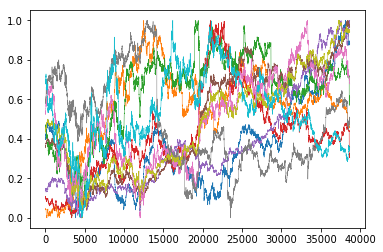

In [212]:
plt.plot(data1[:,:10], linewidth = 0.5)
plt.show()

In [191]:
sel_dataprices

,ABT,ABX,ADM,AKS,BABA,BAC,BEN,BMY,C,CHK,...,TWTR,V,VALE,VZ,WFC,WFT,WMB,WMT,WPX,XOM
datetime,,,,,,,,,,,,,,,,,,,,,
1447666500000000000,44.22,7.63,37.81,2.58,76.34,17.20,39.68,64.56,52.95,6.14,...,25.65,78.17,3.95,44.24,54.71,10.27,35.71,56.66,8.59,78.44
1447666800000000000,44.27,7.69,38.14,2.67,77.44,17.27,39.76,64.29,53.13,6.13,...,25.72,78.18,3.98,44.40,54.73,10.43,36.56,56.83,8.69,79.06
1447667100000000000,44.36,7.68,38.22,2.67,77.48,17.25,39.82,64.09,53.05,6.16,...,25.55,78.05,3.97,44.36,54.72,10.45,36.38,56.89,8.59,79.18
1447667400000000000,44.40,7.67,38.32,2.71,77.48,17.24,39.69,64.11,53.06,6.14,...,25.47,78.01,3.96,44.43,54.68,10.37,36.06,56.79,8.47,79.07
1447667700000000000,44.38,7.63,38.24,2.67,77.35,17.18,39.63,63.96,52.90,6.10,...,25.28,78.07,3.95,44.31,54.68,10.28,35.88,56.81,8.40,78.80
1447668000000000000,44.36,7.62,38.15,2.67,77.29,17.10,39.61,63.95,52.70,6.05,...,25.20,77.96,3.93,44.33,54.60,10.20,35.93,56.85,8.38,78.72
1447668300000000000,44.39,7.58,38.18,2.65,77.36,17.10,39.58,64.18,52.69,6.04,...,25.13,77.99,3.92,44.33,54.51,10.14,36.07,56.86,8.30,78.54
1447668600000000000,44.35,7.60,38.09,2.64,77.71,17.03,39.51,64.34,52.51,6.03,...,25.23,77.98,3.92,44.37,54.40,10.11,36.03,56.78,8.24,78.30
1447668900000000000,44.36,7.69,38.20,2.67,78.17,17.07,39.55,64.47,52.68,6.06,...,25.35,77.89,3.93,44.40,54.53,10.26,36.19,56.76,8.33,78.68
